<a href="https://colab.research.google.com/github/MC-Codingcat/911-Calls-Data-Analysis/blob/main/911_Calls_Data_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **911 Calls Capstone Project**

This is a capstone project from course - *Python for Data Science and Machine Learning Bootcamp*.

Some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert) will be analyzed (data of Montgomery County, PA, US),
focusing on descriptive analysis and data visualization.

The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, always 1



## **Data and Setup**

____
**Import numpy and pandas**

In [ ]:
import numpy as np
import pandas as pd

**Import visualization libraries and set %matplotlib inline.**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Read in the csv file as a dataframe called df**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/10-Data-Capstone-Projects/911.csv',sep=',')

**Check the info() and the head() of the df**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [ ]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


## **Basic Questions**

**What are the top 5 zipcodes for 911 calls?**

In [ ]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [67]:
df['zip'].value_counts().describe()

count     104.000000
mean      833.048077
std      1330.406299
min         1.000000
25%        13.250000
50%       287.500000
75%      1099.250000
max      6979.000000
Name: zip, dtype: float64

**What are the top 5 townships (twp) for 911 calls?**

In [ ]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**How many unique title codes (reasons for calls) are there?**

In [ ]:
df['title'].nunique()

110

## **Creating new features**

**In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic.**

**Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.**

*For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.*

In [ ]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

**What is the most common Reason for a 911 call based off of this new column?**

In [ ]:
df['Reason'].value_counts().head()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

**Use seaborn to create a countplot of 911 calls by Reason.**

<Axes: xlabel='Reason', ylabel='count'>

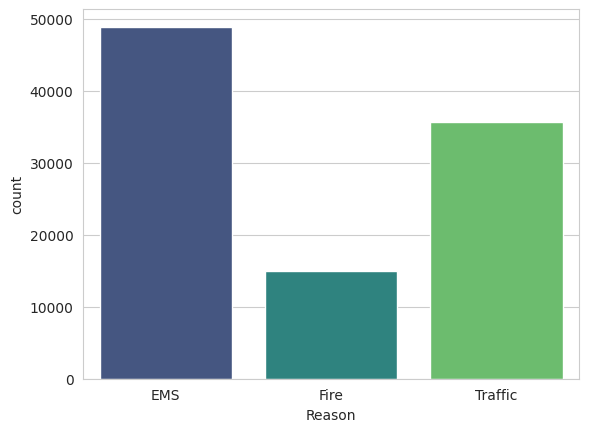

In [ ]:
sns.countplot(data=df,x=df['Reason'],palette='viridis')

___
**There is time information in the timeStamp column. It is useful for time series analysis.**

In [ ]:
type(df['timeStamp'].iloc[0])

str

**However, these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.**

In [ ]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [ ]:
# check the data type of the contents in the timeStamp column
df['timeStamp'].iloc[0]

Timestamp('2015-12-10 17:40:00')

**The DateTime objects have specific attributes that can be called conveniently for temporal data analysis. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour


In [ ]:
df['timeStamp'].iloc[0].weekofyear

50

In [61]:
df['timeStamp'].iloc[2].dayofweek

3

**Use .apply() to create 3 new columns called Hour, Month, and Day of Week for further analysis.**

In [ ]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day_of_Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day_of_Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [ ]:
df['timeStamp'].iloc[0].date()

datetime.date(2015, 12, 10)

**The "Day of Week" value is now an integer 0-6. Use the .map() with the dictionary below to map the actual string names to the day of the week.**

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [ ]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [ ]:
df['Day_of_Week'] = df['Day_of_Week'].map(dmap)

**Use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

<Axes: xlabel='Day_of_Week', ylabel='count'>

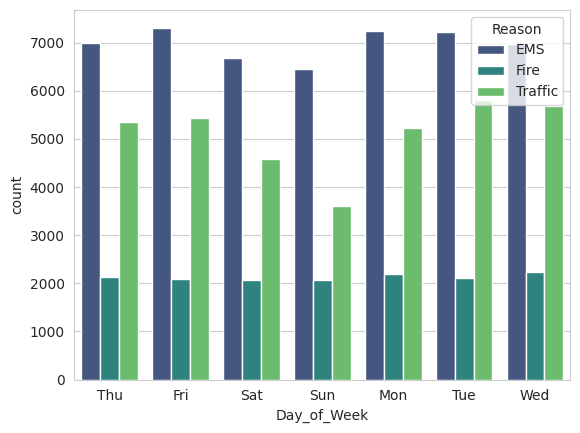

In [ ]:
sns.countplot(data=df, x=df['Day_of_Week'], hue=df['Reason'],palette='viridis')

**Now do the same for Month:**

<Axes: xlabel='Month', ylabel='count'>

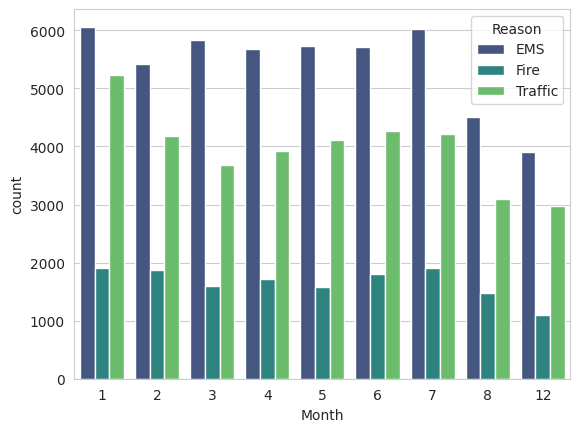

In [ ]:
sns.countplot(data=df, x=df['Month'],hue=df['Reason'],palette='viridis')

**Some months are missing (with no data), let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months.**

To do so we first need the numbers of calls for each month:

In [63]:
byMonth = df.groupby('Month').count()
byMonth['e']

Month
1     13205
2     11467
3     11101
4     11326
5     11423
6     11786
7     12137
8      9078
12     7969
Name: e, dtype: int64

**Now create a simple plot based on the dataframe indicating the count of calls per month.**

<Axes: xlabel='Month', ylabel='e'>

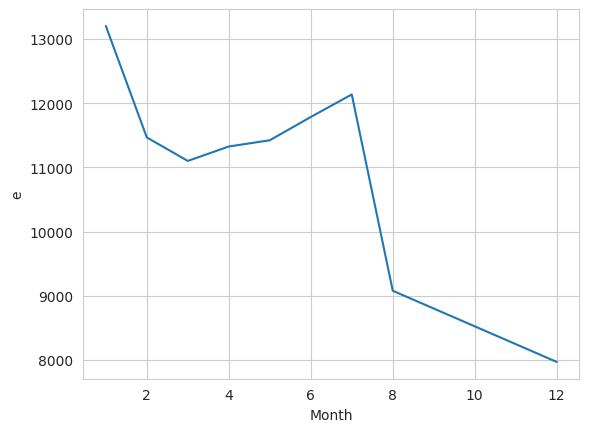

In [ ]:
sns.lineplot(data=byMonth, x='Month', y='e')

**A seaborn's lmplot() can be applied to create a linear fit on the number of calls per month. The index is now months and needs to be reset.**

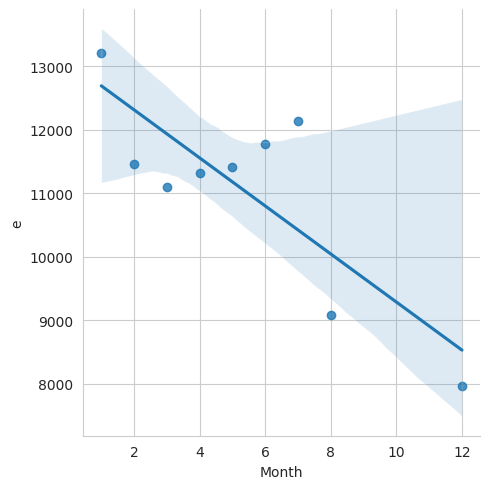

In [ ]:
sns.lmplot(data=byMonth.reset_index(), x='Month', y='e')

**Create a new column called 'Date' that contains the date from the timeStamp column.**

In [ ]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

**Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

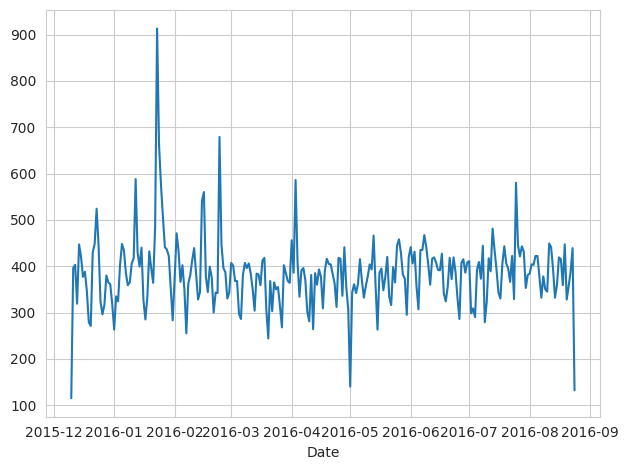

In [ ]:
df.groupby('Date').count()['e'].plot()
plt.tight_layout()

**Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 calls.**

Text(0.5, 1.0, 'Traffic')

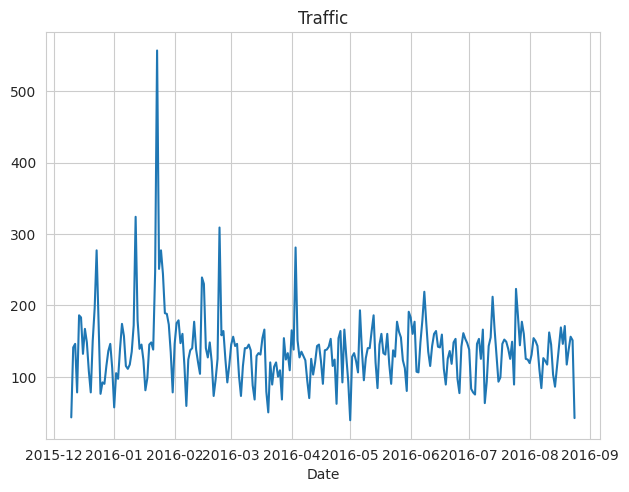

In [ ]:
df[df['Reason']=='Traffic'].groupby('Date').count()['e'].plot()
plt.tight_layout()
plt.title('Traffic')

Text(0.5, 1.0, 'Fire')

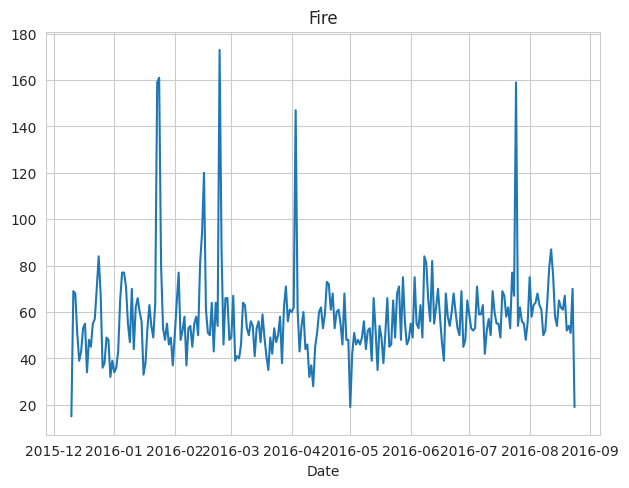

In [ ]:
df[df['Reason']=='Fire'].groupby('Date').count()['e'].plot()
plt.tight_layout()
plt.title('Fire')

Text(0.5, 1.0, 'EMS')

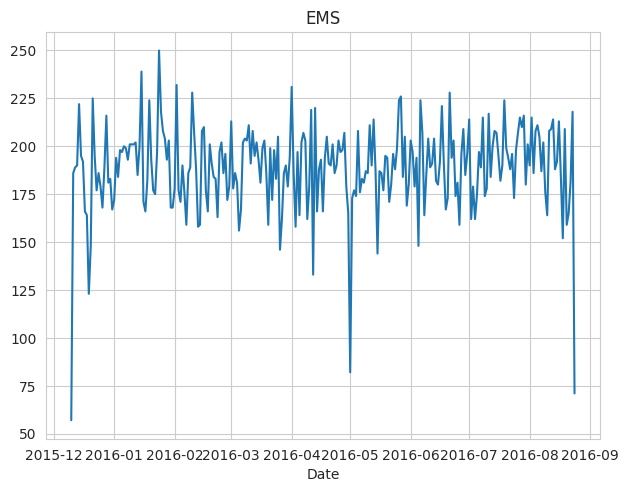

In [ ]:
df[df['Reason']=='EMS'].groupby('Date').count()['e'].plot()
plt.tight_layout()
plt.title('EMS')

____
**Let's move on to creating heatmaps. The dataframe needs to be restructured so that the columns become the Hours and the Index becomes the Day of the Week. Here the method is to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method.**

In [44]:
day_cluster=df.groupby(['Hour','Day_of_Week']).count()['e'].unstack(level=0)
day_cluster.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day_of_Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


**Now create a HeatMap using this new DataFrame.**

<Axes: xlabel='Hour', ylabel='Day_of_Week'>

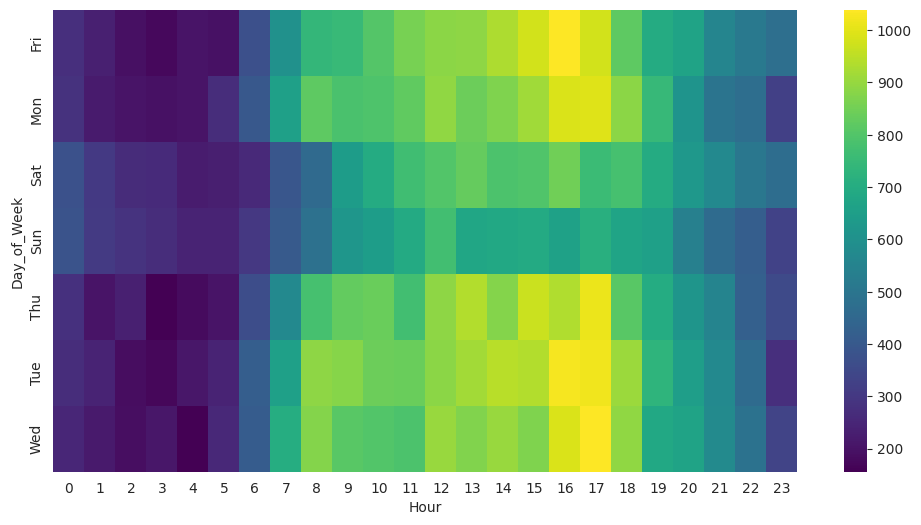

In [43]:
plt.figure(figsize=(12,6))
sns.heatmap(data=day_cluster,cmap='viridis')

**Now create a clustermap using this DataFrame.**

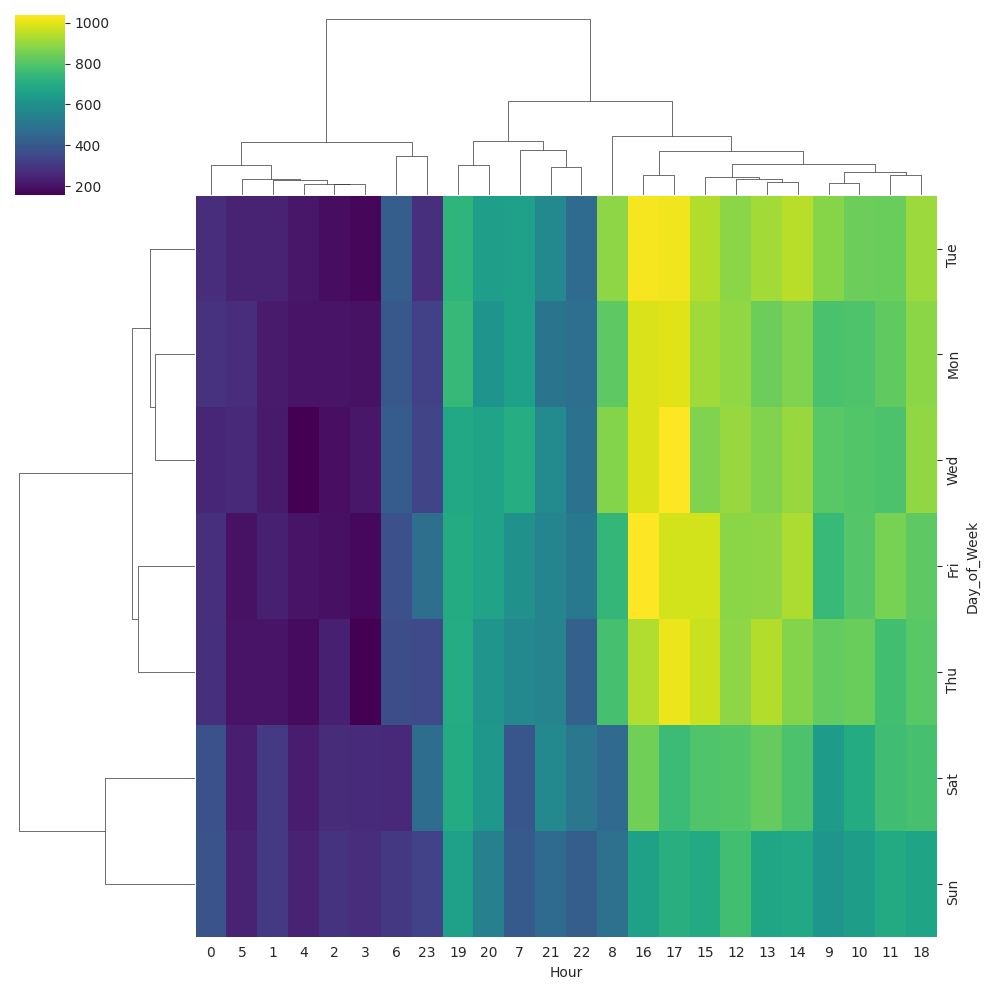

In [47]:
sns.clustermap(data=day_cluster, cmap='viridis')

**The same plots and operations are repeated for a DataFrame that shows the Month as the column.**

In [53]:
month_cluster = df.groupby(['Month','Day_of_Week']).count()['e'].unstack(level=0)
month_cluster.head()

Month,1,2,3,4,5,6,7,8,12
Day_of_Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<Axes: xlabel='Month', ylabel='Day_of_Week'>

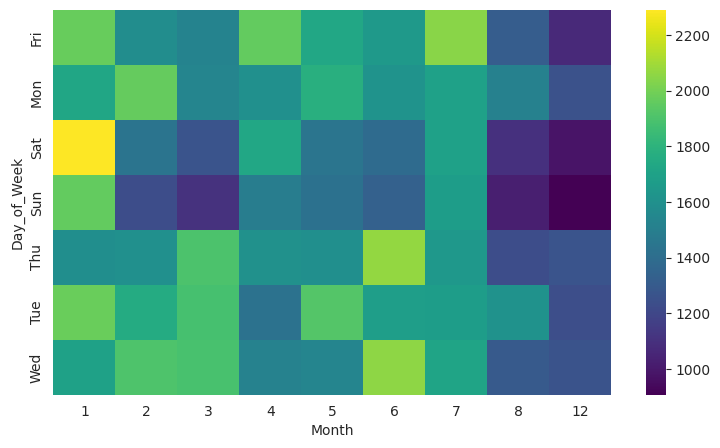

In [58]:
plt.figure(figsize=(9,5))
sns.heatmap(data=month_cluster, cmap='viridis')

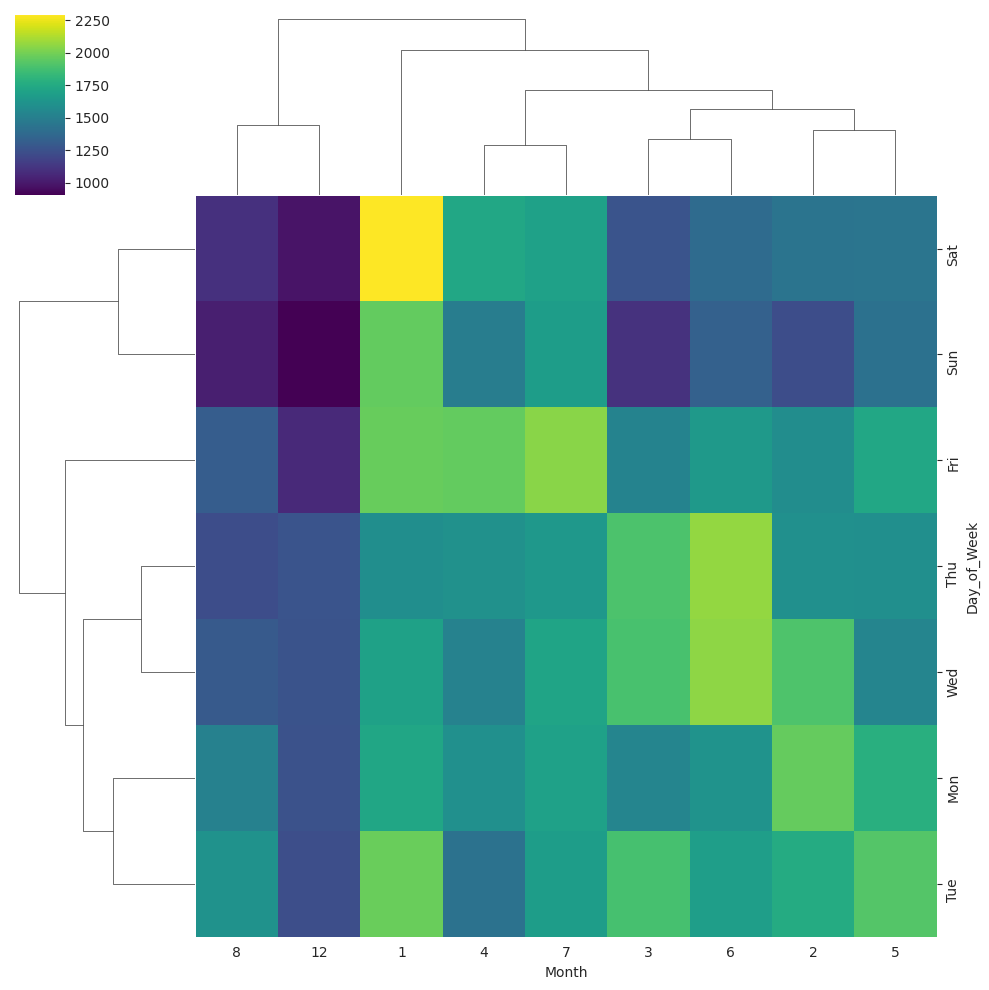

In [60]:
sns.clustermap(data=month_cluster, cmap='viridis')